Theodore 

The purpose of this notebook is to analyze the data stored in the .npz file.

### Load the data 

In [2]:
## ------------------------ IMPORT LIB ------------------------ ##

import numpy as np
import matplotlib.pyplot as plt
from DataSet import DataSet
from PostProcessor import PostProcessor
from scipy.stats import linregress

## A) HP 

In [3]:
pp4 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA4.npz')
pp4.load_data(load_hyperparams=True)

pp5 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA5_10rep.npz')
pp5.load_data(load_hyperparams=True)

pp6 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA6_10rep.npz')
pp6.load_data(load_hyperparams=True)

pp7 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA7_10rep.npz')
pp7.load_data(load_hyperparams=True)

pp8 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA8_10rep.npz')
pp8.load_data(load_hyperparams=True)

pp10 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA10_10rep.npz')
pp10.load_data(load_hyperparams=True)

pp12 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA12_10rep.npz')
pp12.load_data(load_hyperparams=True)

In [5]:
lengthscale4, outputscale4, noise4 = pp4.hyperparams_metrics()
lengthscale5, outputscale5, noise5 = pp5.hyperparams_metrics()
lengthscale6, outputscale6, noise6 = pp6.hyperparams_metrics()
lengthscale7, outputscale7, noise7 = pp7.hyperparams_metrics()
lengthscale8, outputscale8, noise8 = pp8.hyperparams_metrics()
lengthscale10, outputscale10, noise10 = pp10.hyperparams_metrics()
lengthscale12, outputscale12, noise12 = pp12.hyperparams_metrics()

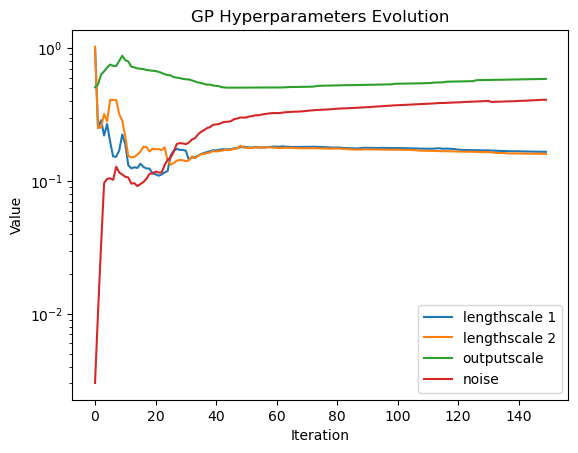

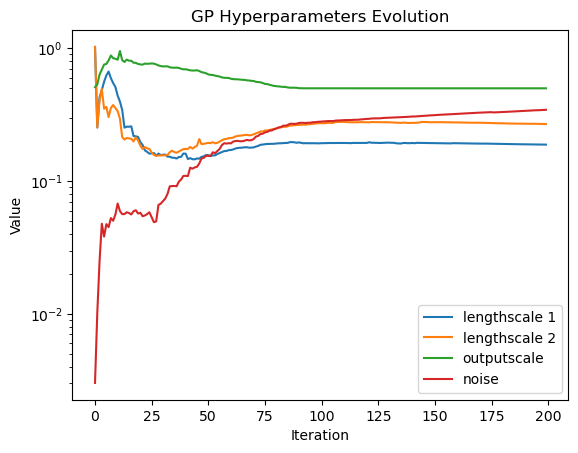

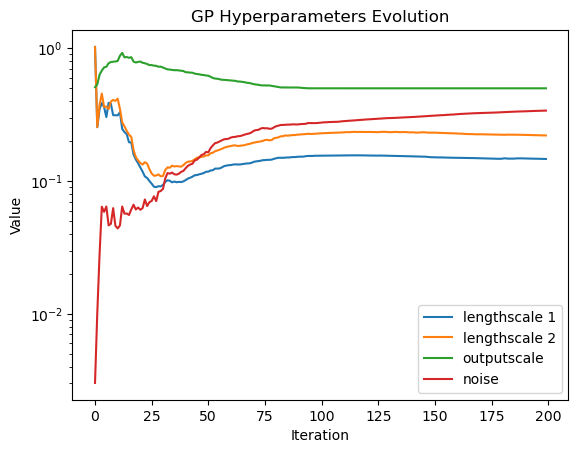

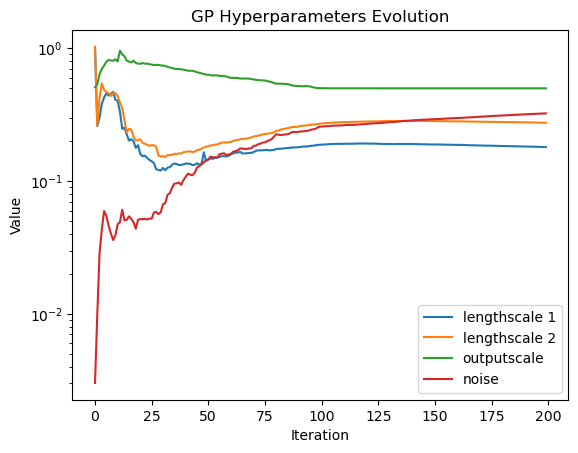

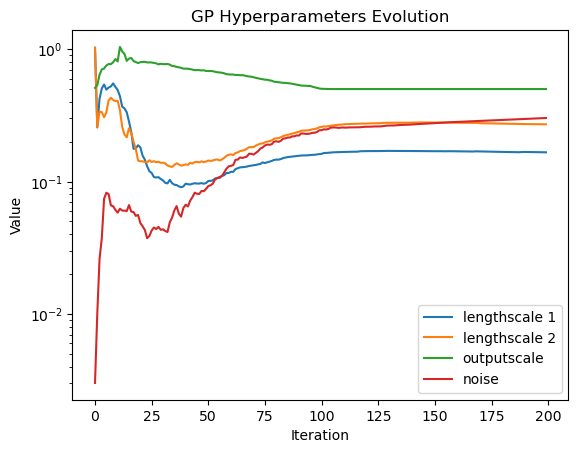

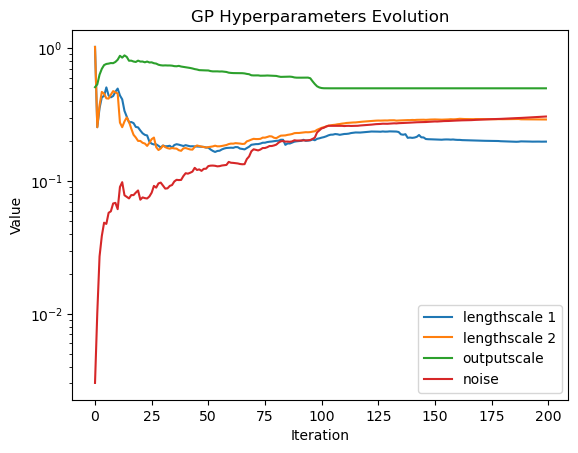

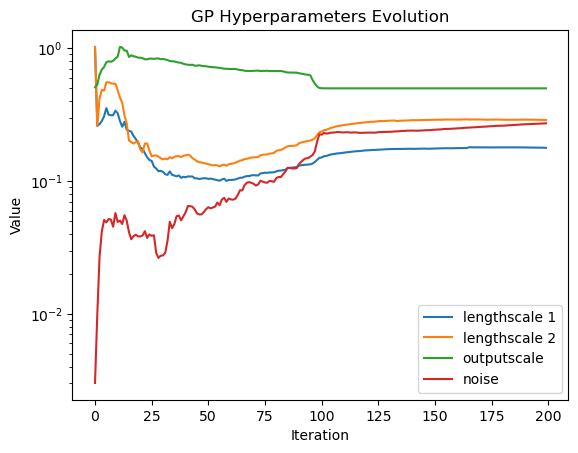

In [7]:
plt.figure()
plt.plot(lengthscale4[0], label='lengthscale 1')
plt.plot(lengthscale4[1], label='lengthscale 2') 
plt.plot(outputscale4, label='outputscale')
plt.plot(noise4, label='noise')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('GP Hyperparameters Evolution')
plt.show()

plt.figure()
plt.plot(lengthscale5[0], label='lengthscale 1')
plt.plot(lengthscale5[1], label='lengthscale 2') 
plt.plot(outputscale5, label='outputscale')
plt.plot(noise5, label='noise')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('GP Hyperparameters Evolution')
plt.show()

plt.figure()
plt.plot(lengthscale6[0], label='lengthscale 1')
plt.plot(lengthscale6[1], label='lengthscale 2') 
plt.plot(outputscale6, label='outputscale')
plt.plot(noise6, label='noise')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('GP Hyperparameters Evolution')
plt.show()

plt.figure()
plt.plot(lengthscale7[0], label='lengthscale 1')
plt.plot(lengthscale7[1], label='lengthscale 2') 
plt.plot(outputscale7, label='outputscale')
plt.plot(noise7, label='noise')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('GP Hyperparameters Evolution')
plt.show()

plt.figure()
plt.plot(lengthscale8[0], label='lengthscale 1')
plt.plot(lengthscale8[1], label='lengthscale 2') 
plt.plot(outputscale8, label='outputscale')
plt.plot(noise8, label='noise')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('GP Hyperparameters Evolution')
plt.show()

plt.figure()
plt.plot(lengthscale10[0], label='lengthscale 1')
plt.plot(lengthscale10[1], label='lengthscale 2') 
plt.plot(outputscale10, label='outputscale')
plt.plot(noise10, label='noise')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('GP Hyperparameters Evolution')
plt.show()

plt.figure()
plt.plot(lengthscale12[0], label='lengthscale 1')
plt.plot(lengthscale12[1], label='lengthscale 2') 
plt.plot(outputscale12, label='outputscale')
plt.plot(noise12, label='noise')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('GP Hyperparameters Evolution')
plt.show()


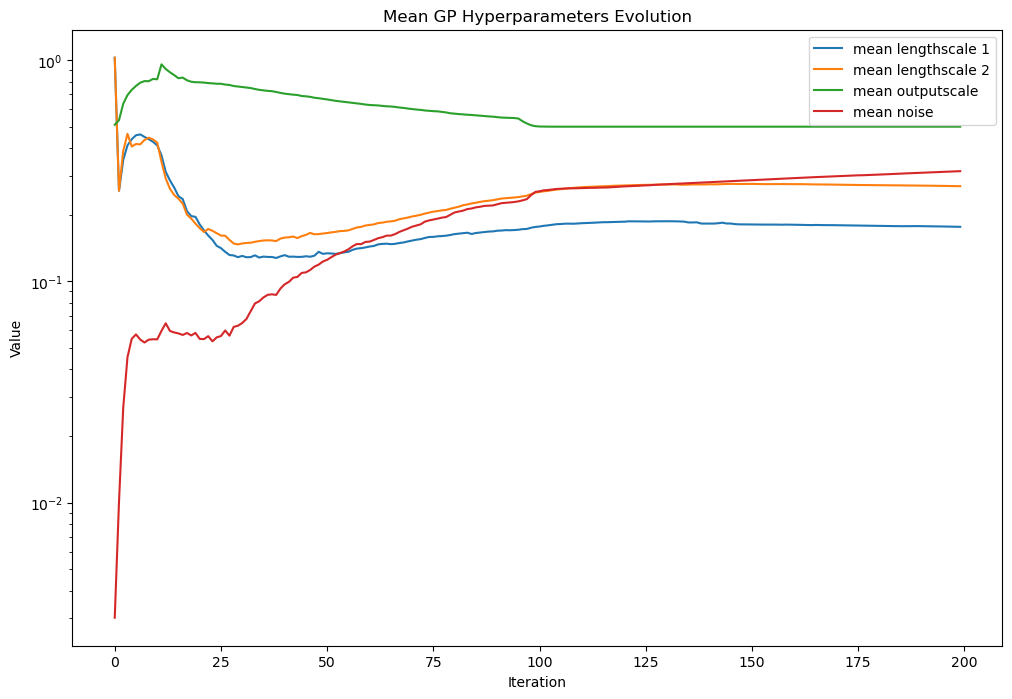

In [18]:

plt.figure(figsize=(12,8))
# Calculate mean across all lengthscales, outputscales and noises
mean_ls1 = np.mean([lengthscale5[0], lengthscale6[0], 
                    lengthscale7[0], lengthscale8[0], lengthscale10[0], 
                    lengthscale12[0]], axis=0)
mean_ls2 = np.mean([lengthscale5[1], lengthscale6[1],
                    lengthscale7[1], lengthscale8[1], lengthscale10[1],
                    lengthscale12[1]], axis=0)
mean_os = np.mean([outputscale5, outputscale6, outputscale7,
                   outputscale8, outputscale10, outputscale12], axis=0)
mean_noise = np.mean([noise5, noise6, noise7, noise8, noise10, noise12], axis=0)

# Plot means
plt.plot(mean_ls1, label='mean lengthscale 1')
plt.plot(mean_ls2, label='mean lengthscale 2')
plt.plot(mean_os, label='mean outputscale') 
plt.plot(mean_noise, label='mean noise')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Mean GP Hyperparameters Evolution')
plt.show()


In [10]:
print("Shapes:")
print(f"lengthscale4[0]: {len(lengthscale4[0])}")
print(f"lengthscale5[0]: {len(lengthscale5[0])}")
print(f"lengthscale6[0]: {len(lengthscale6[0])}")
print(f"lengthscale7[0]: {len(lengthscale7[0])}")
print(f"lengthscale8[0]: {len(lengthscale8[0])}")
print(f"lengthscale10[0]: {len(lengthscale10[0])}")
print(f"lengthscale12[0]: {len(lengthscale12[0])}")

Shapes:
lengthscale4[0]: 150
lengthscale5[0]: 200
lengthscale6[0]: 200
lengthscale7[0]: 200
lengthscale8[0]: 200
lengthscale10[0]: 200
lengthscale12[0]: 200


## B) exploration et exploitation

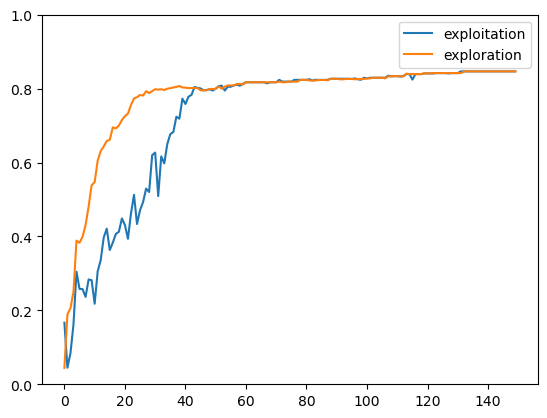

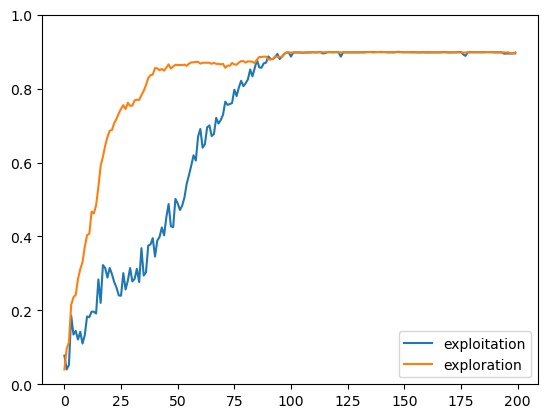

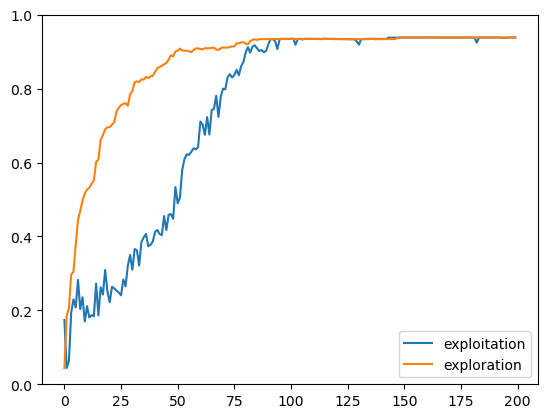

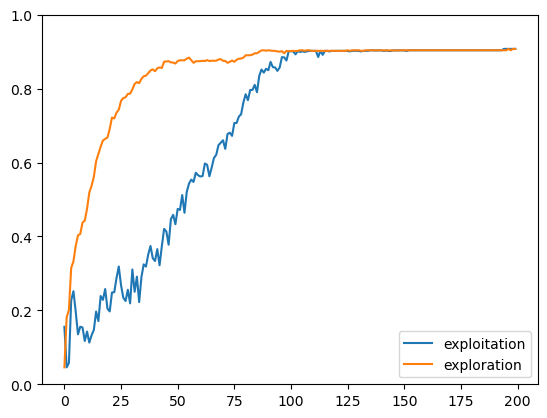

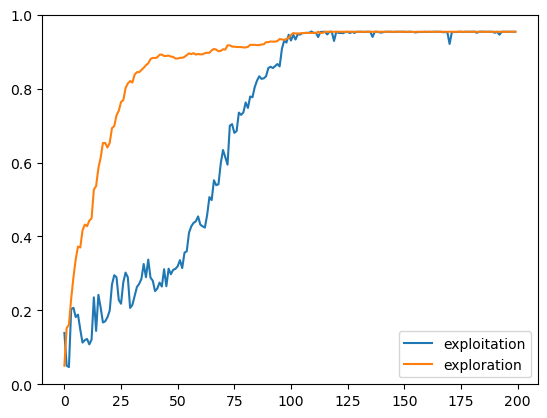

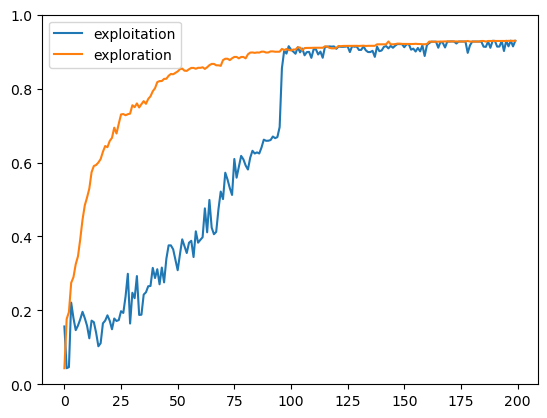

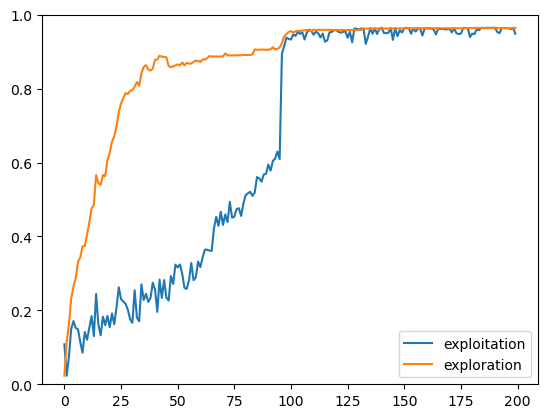

In [8]:
plt.plot(pp4.exploitation(), label='exploitation')
plt.plot(pp4.exploration(), label='exploration')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.plot(pp5.exploitation(), label='exploitation')
plt.plot(pp5.exploration(), label='exploration')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.plot(pp6.exploitation(), label='exploitation')
plt.plot(pp6.exploration(), label='exploration')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.plot(pp7.exploitation(), label='exploitation')
plt.plot(pp7.exploration(), label='exploration')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.plot(pp8.exploitation(), label='exploitation')
plt.plot(pp8.exploration(), label='exploration')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.plot(pp10.exploitation(), label='exploitation')
plt.plot(pp10.exploration(), label='exploration')
plt.legend()
plt.ylim(0,1)
plt.show()

plt.plot(pp12.exploitation(), label='exploitation')
plt.plot(pp12.exploration(), label='exploration')
plt.legend()
plt.ylim(0,1)
plt.show()

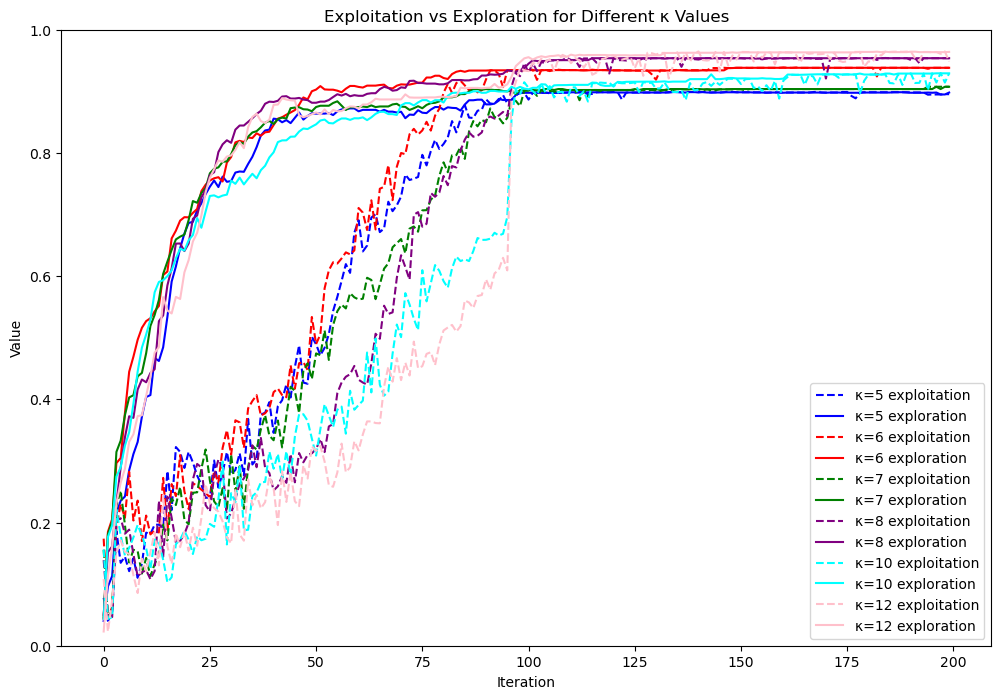

In [17]:
# Define colors for each kappa value
colors = ['blue', 'red', 'green', 'purple', 'cyan', 'pink']

# Plot exploitation (dashed) and exploration (solid) for each pp
# plt.plot(pp4.exploitation(), '--', color=colors[0], label='κ=4 exploitation')
# plt.plot(pp4.exploration(), '-', color=colors[0], label='κ=4 exploration')
plt.figure(figsize=(12,8))


plt.plot(pp5.exploitation(), '--', color=colors[0], label='κ=5 exploitation')
plt.plot(pp5.exploration(), '-', color=colors[0], label='κ=5 exploration')

plt.plot(pp6.exploitation(), '--', color=colors[1], label='κ=6 exploitation') 
plt.plot(pp6.exploration(), '-', color=colors[1], label='κ=6 exploration')

plt.plot(pp7.exploitation(), '--', color=colors[2], label='κ=7 exploitation') 
plt.plot(pp7.exploration(), '-', color=colors[2], label='κ=7 exploration')

plt.plot(pp8.exploitation(), '--', color=colors[3], label='κ=8 exploitation')
plt.plot(pp8.exploration(), '-', color=colors[3], label='κ=8 exploration')

plt.plot(pp10.exploitation(), '--', color=colors[4], label='κ=10 exploitation')
plt.plot(pp10.exploration(), '-', color=colors[4], label='κ=10 exploration')

plt.plot(pp12.exploitation(), '--', color=colors[5], label='κ=12 exploitation')
plt.plot(pp12.exploration(), '-', color=colors[5], label='κ=12 exploration')

plt.legend()
plt.ylim(0,1)
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Exploitation vs Exploration for Different κ Values')
plt.show()

## C) Other

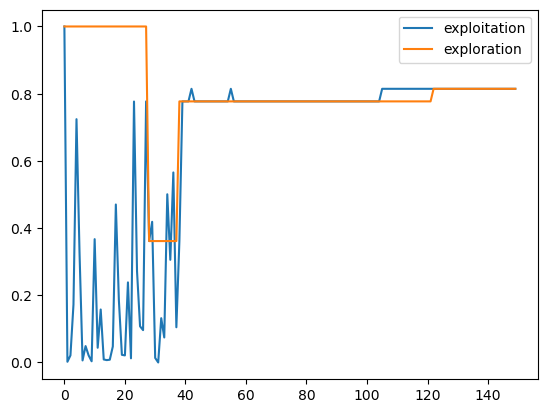

In [14]:
A = ([0],[1])
plt.plot(pp10.exploitation(*A), label='exploitation')
plt.plot(pp10.exploration(*A), label='exploration')
plt.legend()
plt.show()


In [3]:
pp = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_tttest_hyp_valid.npz')
pp.load_data(load_hyperparams=True)

In [4]:
print(
    pp.hyperparams_lengthscale[0,0,0,:],
pp.hyperparams_lengthscale[0,0,1,:],
pp.QI_hyperparams_lengthscale[0,0,0,:],
pp.QI_hyperparams_lengthscale[0,0,1,:],
)

[1.025      0.17257665 0.18414128 0.05194038 0.05013821 0.05002813
 0.05000634 0.05000108 0.0500003  0.05000011 0.05000006 0.05000003
 0.05000003 0.05000002 0.05000002 0.05000005 0.05000019 0.05000103
 0.05000835 0.05017384 0.05147294 0.16417978 0.17525907 0.18454511
 0.20108263 0.13645407 0.08905956 0.08070336 0.08841    0.08702198
 0.08602737 0.08565919 0.0876429  0.08584264 0.08798642 0.0762861
 0.07732603 0.0768977  0.07784376 0.07780503 0.07755302 0.07924196
 0.08838041 0.09067171 0.10804483 0.14759058 0.1454921  0.14912013
 0.15019165 0.14968315 0.15731549 0.16061718 0.16278152 0.16715634
 0.16759461 0.1708693  0.17085044 0.17521178 0.17630746 0.17638507
 0.17651549 0.177072   0.17745899 0.17854288 0.18020953 0.18327393
 0.18516965 0.18529858 0.18633588 0.18690748 0.18927351 0.18940323
 0.19049728 0.19199985 0.19232794 0.19315606 0.19494942 0.19500546
 0.19577506 0.19644324 0.19683253 0.19695817 0.19704695 0.19733791
 0.19772619 0.1988158  0.19956405 0.20055299 0.24927217 0.24634

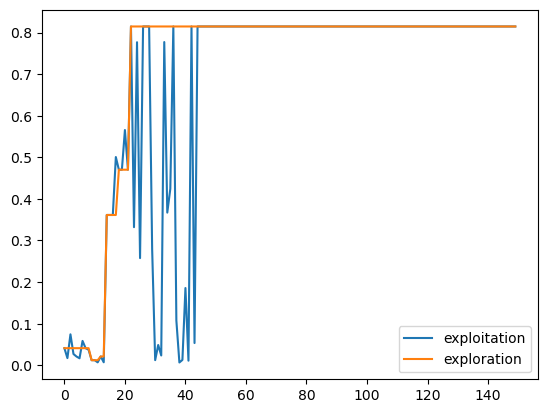

In [5]:
plt.plot(pp.exploitation(), label='exploitation')
plt.plot(pp.exploration(), label='exploration')
plt.legend()
plt.show()

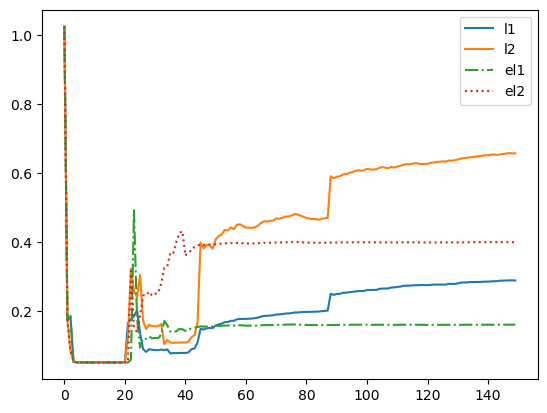

In [6]:
plt.plot(pp.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pp.hyperparams_lengthscale[0,0,1,:], label='l2')
plt.plot(pp.QI_hyperparams_lengthscale[0,0,0,:], label='el1', ls='-.')
plt.plot(pp.QI_hyperparams_lengthscale[0,0,1,:], label='el2', ls=':')
plt.legend()
plt.show()


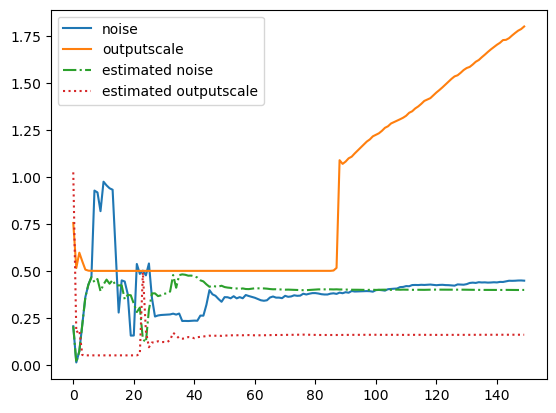

In [7]:
plt.plot(pp.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pp.hyperparams_outputscale[0,0,0,:], label='outputscale')
plt.plot(pp.QI_hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
plt.plot(pp.hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()

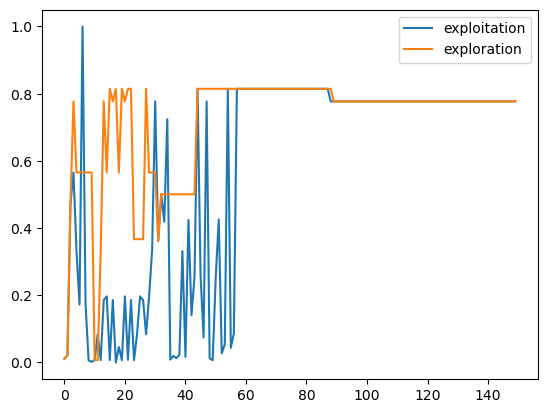

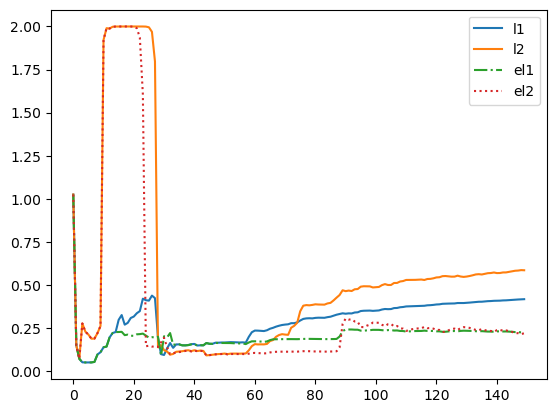

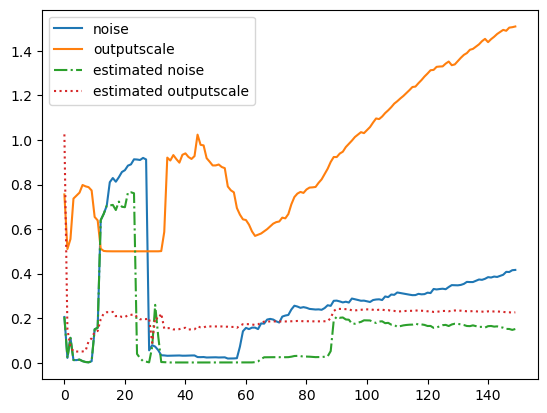

In [8]:
pp = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_tttest_hyp_valid.npz')
pp.load_data(load_hyperparams=True)

plt.plot(pp.exploitation(), label='exploitation')
plt.plot(pp.exploration(), label='exploration')
plt.legend()
plt.show()

plt.plot(pp.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pp.hyperparams_lengthscale[0,0,1,:], label='l2')
plt.plot(pp.QI_hyperparams_lengthscale[0,0,0,:], label='el1', ls='-.')
plt.plot(pp.QI_hyperparams_lengthscale[0,0,1,:], label='el2', ls=':')
plt.legend()
plt.show()

plt.plot(pp.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pp.hyperparams_outputscale[0,0,0,:], label='outputscale')
plt.plot(pp.QI_hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
plt.plot(pp.hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()

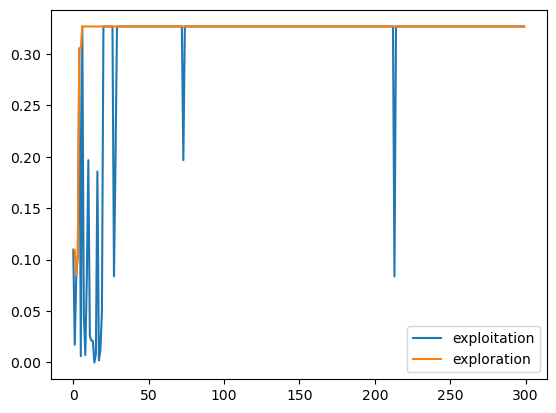

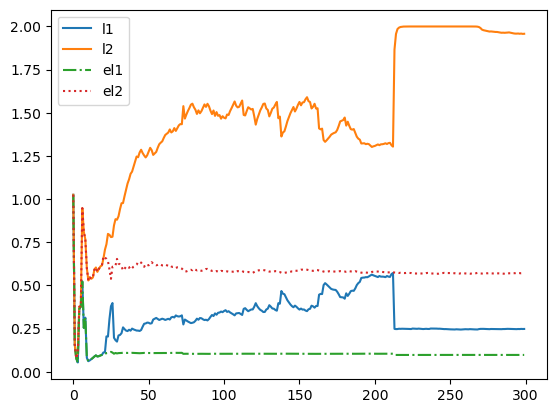

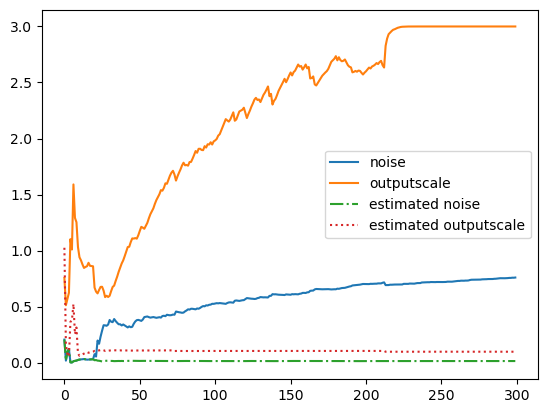

In [9]:
pp = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_tttest_hyp_valid.npz')
pp.load_data(load_hyperparams=True)

plt.plot(pp.exploitation(), label='exploitation')
plt.plot(pp.exploration(), label='exploration')
plt.legend()
plt.show()

plt.plot(pp.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pp.hyperparams_lengthscale[0,0,1,:], label='l2')
plt.plot(pp.QI_hyperparams_lengthscale[0,0,0,:], label='el1', ls='-.')
plt.plot(pp.QI_hyperparams_lengthscale[0,0,1,:], label='el2', ls=':')
plt.legend()
plt.show()

plt.plot(pp.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pp.hyperparams_outputscale[0,0,0,:], label='outputscale')
plt.plot(pp.QI_hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
plt.plot(pp.hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()

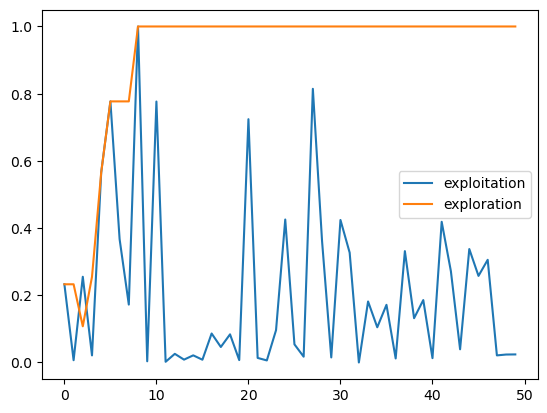

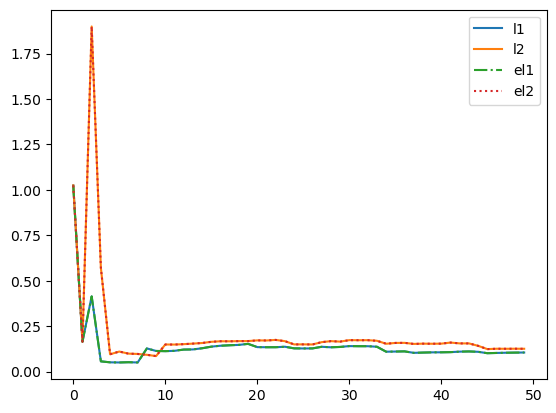

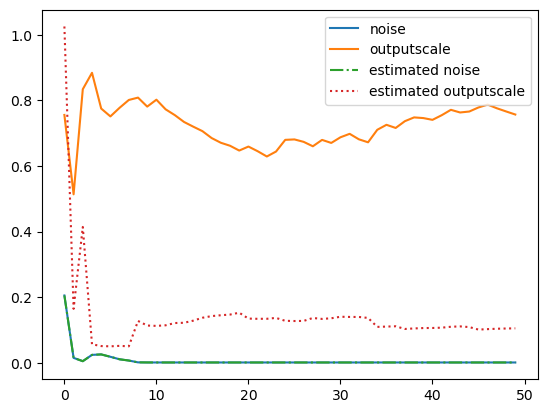

In [17]:
pp = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_tttest_hyp_valid.npz')
pp.load_data(load_hyperparams=True)

plt.plot(pp.exploitation(), label='exploitation')
plt.plot(pp.exploration(), label='exploration')
plt.legend()
plt.show()

plt.plot(pp.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pp.hyperparams_lengthscale[0,0,1,:], label='l2')
plt.plot(pp.QI_hyperparams_lengthscale[0,0,0,:], label='el1', ls='-.')
plt.plot(pp.QI_hyperparams_lengthscale[0,0,1,:], label='el2', ls=':')
plt.legend()
plt.show()

plt.plot(pp.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pp.hyperparams_outputscale[0,0,0,:], label='outputscale')
plt.plot(pp.QI_hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
plt.plot(pp.hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()

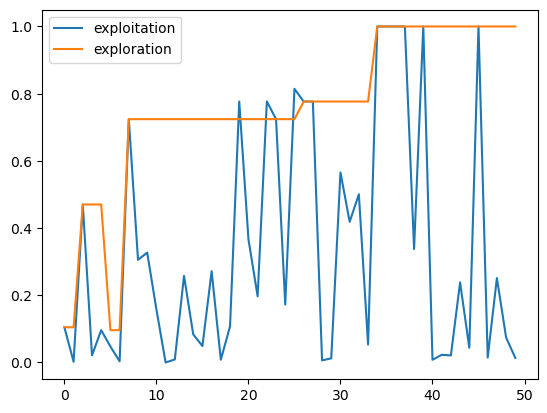

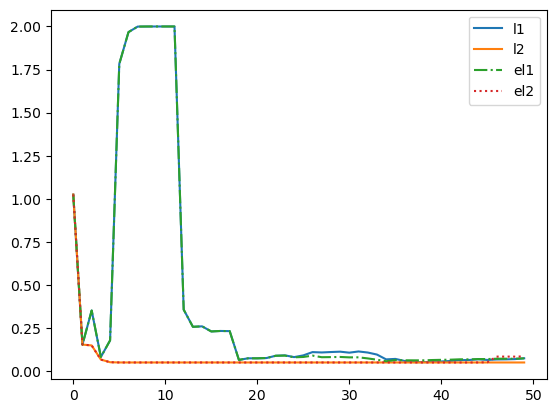

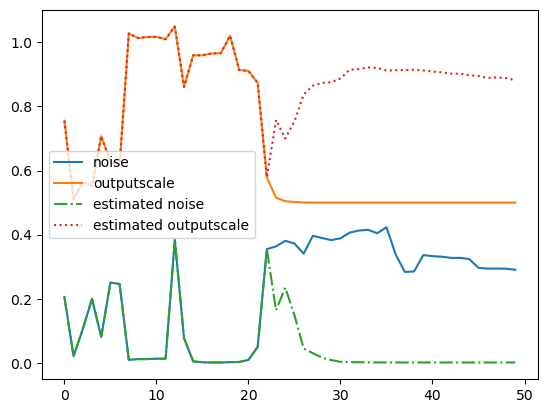

In [21]:
pp = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_tttest_hyp_valid.npz')
pp.load_data(load_hyperparams=True)

plt.plot(pp.exploitation(), label='exploitation')
plt.plot(pp.exploration(), label='exploration')
plt.legend()
plt.show()

plt.plot(pp.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pp.hyperparams_lengthscale[0,0,1,:], label='l2')
plt.plot(pp.QI_hyperparams_lengthscale[0,0,0,:], label='el1', ls='-.')
plt.plot(pp.QI_hyperparams_lengthscale[0,0,1,:], label='el2', ls=':')
plt.legend()
plt.show()

plt.plot(pp.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pp.hyperparams_outputscale[0,0,0,:], label='outputscale')
plt.plot(pp.QI_hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
plt.plot(pp.QI_hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()

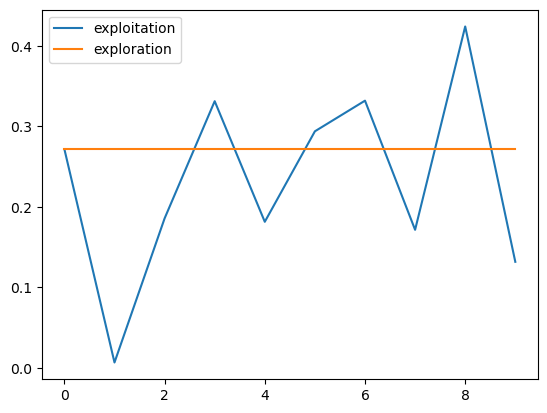

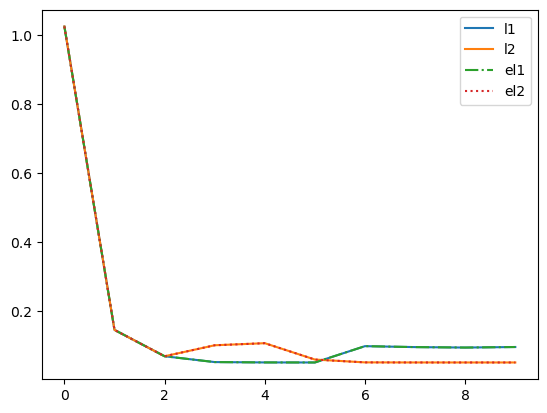

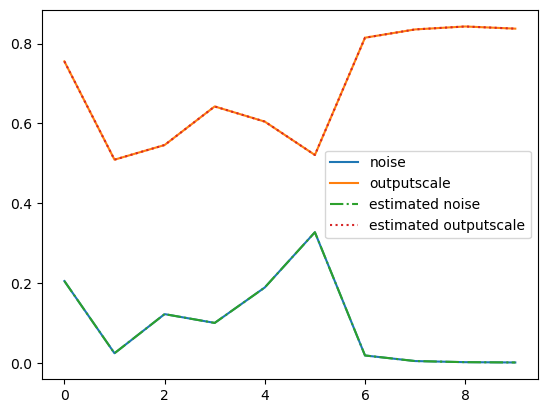

In [24]:
pp = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_tttest_hyp_valid.npz')
pp.load_data(load_hyperparams=True)

plt.plot(pp.exploitation(), label='exploitation')
plt.plot(pp.exploration(), label='exploration')
plt.legend()
plt.show()

plt.plot(pp.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pp.hyperparams_lengthscale[0,0,1,:], label='l2')
plt.plot(pp.QI_hyperparams_lengthscale[0,0,0,:], label='el1', ls='-.')
plt.plot(pp.QI_hyperparams_lengthscale[0,0,1,:], label='el2', ls=':')
plt.legend()
plt.show()

plt.plot(pp.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pp.hyperparams_outputscale[0,0,0,:], label='outputscale')
plt.plot(pp.QI_hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
plt.plot(pp.QI_hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()

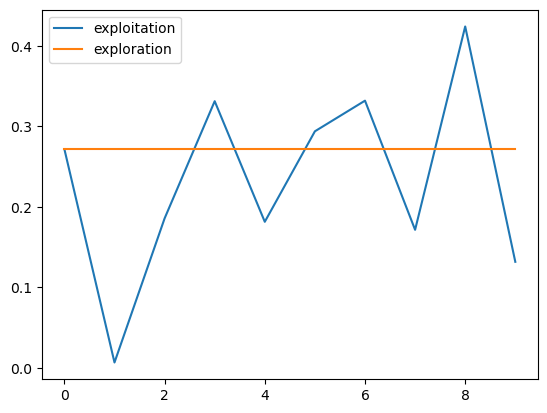

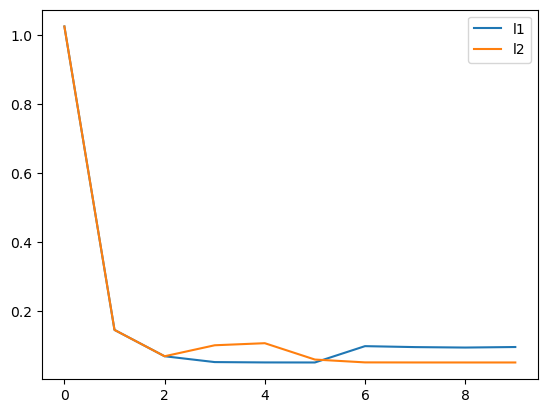

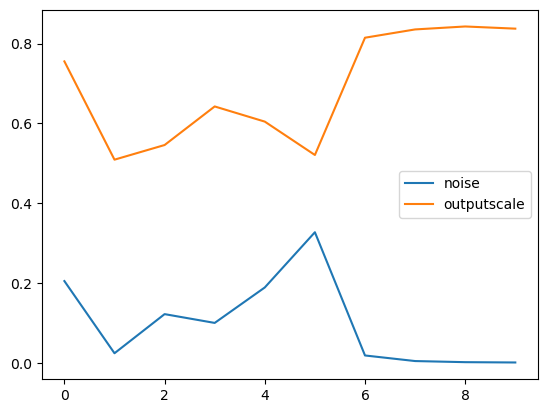

In [25]:
pp = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_tttest_hyp_valid.npz')
pp.load_data(load_hyperparams=True)

plt.plot(pp.exploitation(), label='exploitation')
plt.plot(pp.exploration(), label='exploration')
plt.legend()
plt.show()

plt.plot(pp.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pp.hyperparams_lengthscale[0,0,1,:], label='l2')
plt.legend()
plt.show()

plt.plot(pp.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pp.hyperparams_outputscale[0,0,0,:], label='outputscale')
plt.legend()
plt.show()

In [2]:
pp1 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og.npz')
pp1.load_data(load_hyperparams=True)

pp2 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy.npz')
pp2.load_data(load_hyperparams=True)

pp3 = PostProcessor('results/gpbo_estimated_hp_gpytorch_UCB_cebus1_test_pseudo_hp.npz')
pp3.load_data(load_hyperparams=True)

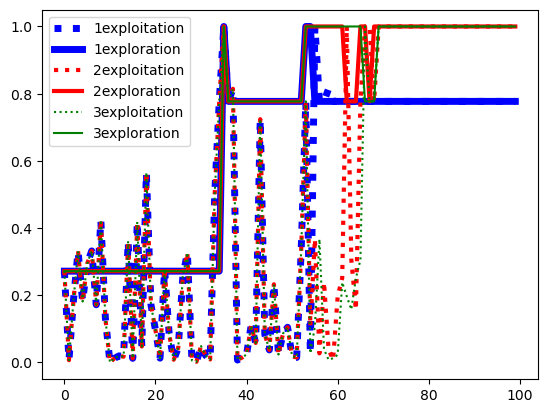

In [12]:
plt.plot(pp1.exploitation(), color='b', linewidth=5, ls=':', label='1exploitation')
plt.plot(pp1.exploration(), color='b', linewidth=5, label='1exploration')
plt.plot(pp2.exploitation(), color='r', linewidth=3, ls=':', label='2exploitation')
plt.plot(pp2.exploration(), color='r', linewidth=3, label='2exploration')
plt.plot(pp3.exploitation(), color='g', ls=':', label='3exploitation')
plt.plot(pp3.exploration(), color='g', label='3exploration')
plt.legend()
plt.show()

In [10]:
pp.QI_hyperparams_noise[0,0,0,:]

array([0.20521765, 0.01776655, 0.09611769, 0.12164233, 0.00230013,
       0.00113056, 0.01175811, 0.01556591, 0.01783392, 0.02355142,
       0.02697593, 0.02842857, 0.03056622, 0.03180864, 0.02882867,
       0.02615759, 0.02763891, 0.02827745, 0.02891784, 0.02986526,
       0.02096128, 0.02291729, 0.01755466, 0.0165864 , 0.01374337,
       0.0098001 , 0.01468138, 0.01521149, 0.01479638, 0.01723854,
       0.01550834, 0.01523337, 0.01458202, 0.0131242 , 0.01374395,
       0.01444894, 0.01458188, 0.01407739, 0.01464277, 0.01396332,
       0.01449094, 0.01478825, 0.01513531, 0.01599107, 0.01616992,
       0.01583043, 0.01508366, 0.01441508, 0.01530525, 0.01503738,
       0.01495572, 0.01526867, 0.01598546, 0.01541579, 0.01518213,
       0.01493635, 0.01508388, 0.01534547, 0.01513313, 0.01491329,
       0.0149069 , 0.01516691, 0.01496696, 0.0147624 , 0.01495165,
       0.01455332, 0.0143719 , 0.01440639, 0.01402911, 0.01424202,
       0.01420993, 0.01404695, 0.01380233, 0.01437033, 0.01377

In [29]:
pp.hyperparams_lengthscale[0,0,0,:]

array([1.025     , 0.17257665, 0.07595566, 0.3150619 , 0.08526216,
       0.18019772, 0.09265321, 0.05801689, 0.06618183, 0.0692326 ,
       0.07355889, 0.18093392, 0.1433283 , 0.15400267, 0.13998583,
       0.14358402, 0.14748627, 0.22339968, 0.21907787, 0.209054  ,
       0.25492568, 0.25481514, 0.24796435, 0.30164887, 0.29364315,
       0.33891055, 0.18667866, 0.18543872, 0.19003982, 0.18966441,
       0.19461129, 0.21697218, 0.22051126, 0.21937179, 0.22480541,
       0.25259567, 0.21125564, 0.20769055, 0.21472077, 0.23832685])

In [21]:
pp.QI_hyperparams_lengthscale[0,0,0,:]-pp.QI_hyperparams_lengthscale[0,0,1,:]

array([ 0.00000000e+00, -1.77937916e-08, -4.91241121e-08, -8.08066436e-09,
       -6.68071198e-09, -5.04664355e-09, -2.23452012e-09, -1.26953914e-09,
       -6.31389385e-10, -3.54485996e-10, -1.85956583e-10, -1.06001652e-10,
       -6.16366957e-11, -3.43680640e-11, -1.75821580e-11, -7.14606152e-12,
        5.34683409e-13,  5.18673993e-12,  8.33155767e-12,  1.00424113e-11,
        1.08653087e-11,  1.14948051e-11,  1.18534071e-11,  1.18791643e-11,
        1.19111387e-11,  1.18411947e-11,  1.15987220e-11,  1.07593934e-11,
        1.02708952e-11,  9.67981251e-12,  9.15822973e-12,  8.67461658e-12,
        8.12283574e-12,  7.63744623e-12,  7.18203275e-12,  6.78967993e-12,
        6.41087183e-12,  6.04405415e-12,  5.65125724e-12,  5.25490762e-12])

## D) exploration et exploitation

In [8]:
pp1 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test1.npz')
pp1.load_data(load_hyperparams=True)

pp2 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy.npz')
pp2.load_data(load_hyperparams=True)

pp3 = PostProcessor('results/gpbo_estimated_hp_gpytorch_UCB_cebus1_test_pseudo_hp.npz')
pp3.load_data(load_hyperparams=True)

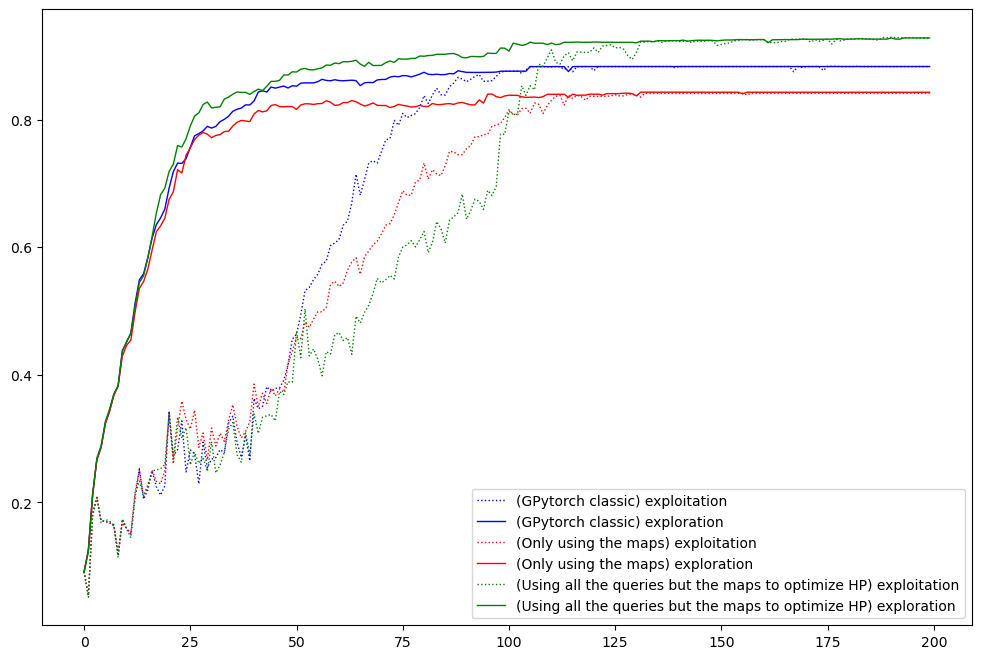

In [11]:
plt.figure(figsize=(12,8))
plt.plot(pp1.exploitation(), color='b', linewidth=1, ls=':', label='(GPytorch classic) exploitation')
plt.plot(pp1.exploration(), color='b', linewidth=1, label='(GPytorch classic) exploration')
plt.plot(pp2.exploitation(), color='r', linewidth=1, ls=':', label='(Only using the maps) exploitation')
plt.plot(pp2.exploration(), color='r', linewidth=1, label='(Only using the maps) exploration')
plt.plot(pp3.exploitation(), color='g', linewidth=1, ls=':', label='(Using all the queries but the maps to optimize HP) exploitation')
plt.plot(pp3.exploration(), color='g', linewidth=1, label='(Using all the queries but the maps to optimize HP) exploration')
plt.legend()
plt.show()

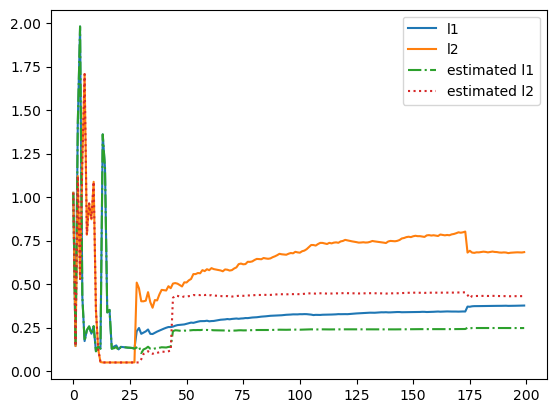

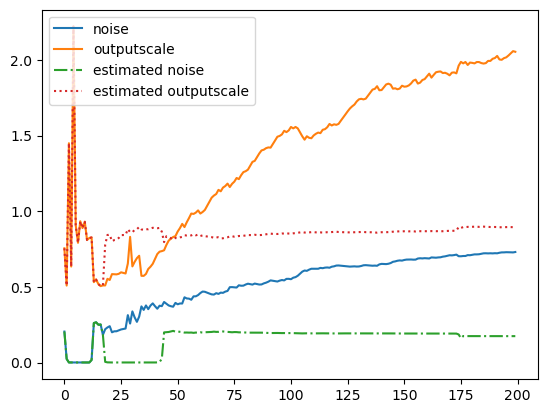

In [13]:
plt.plot(pp1.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pp1.hyperparams_lengthscale[0,0,1,:], label='l2')
plt.plot(pp1.QI_hyperparams_lengthscale[0,0,0,:], label='estimated l1', ls='-.')
plt.plot(pp1.QI_hyperparams_lengthscale[0,0,1,:], label='estimated l2', ls=':')
plt.legend()
plt.show()

plt.plot(pp1.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pp1.hyperparams_outputscale[0,0,0,:], label='outputscale')
plt.plot(pp1.QI_hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
plt.plot(pp1.QI_hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()

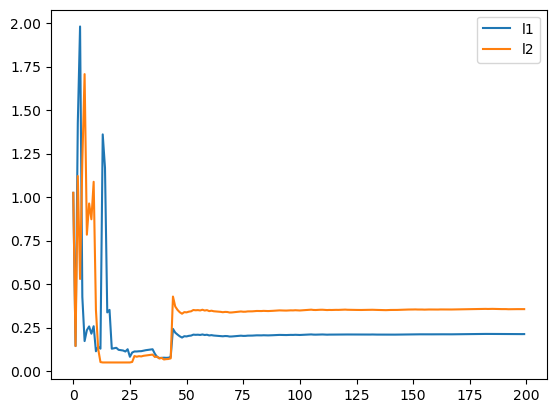

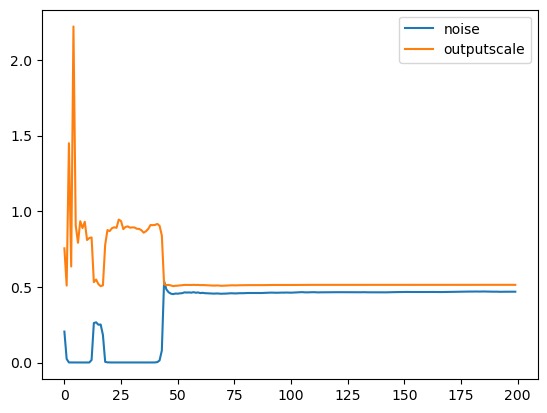

In [15]:
plt.plot(pp2.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pp2.hyperparams_lengthscale[0,0,1,:], label='l2')
# plt.plot(pp2.QI_hyperparams_lengthscale[0,0,0,:], label='estimated l1', ls='-.')
# plt.plot(pp2.QI_hyperparams_lengthscale[0,0,1,:], label='estimated l2', ls=':')
plt.legend()
plt.show()

plt.plot(pp2.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pp2.hyperparams_outputscale[0,0,0,:], label='outputscale')
# plt.plot(pp2.QI_hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
# plt.plot(pp2.QI_hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()

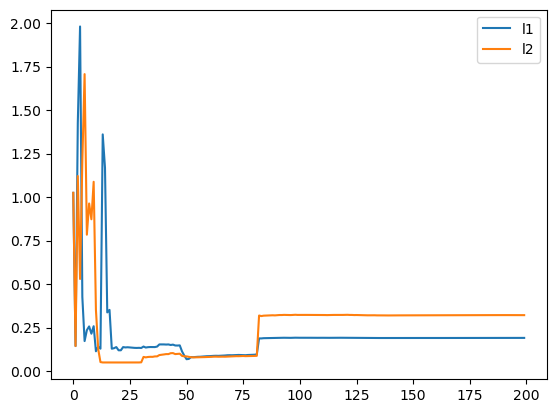

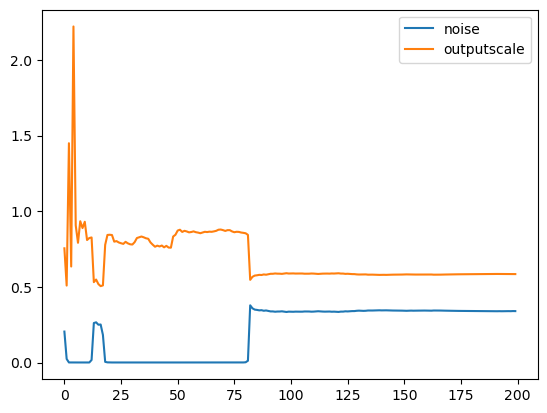

In [16]:
plt.plot(pp3.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pp3.hyperparams_lengthscale[0,0,1,:], label='l2')
# plt.plot(pp2.QI_hyperparams_lengthscale[0,0,0,:], label='estimated l1', ls='-.')
# plt.plot(pp2.QI_hyperparams_lengthscale[0,0,1,:], label='estimated l2', ls=':')
plt.legend()
plt.show()

plt.plot(pp3.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pp3.hyperparams_outputscale[0,0,0,:], label='outputscale')
# plt.plot(pp2.QI_hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
# plt.plot(pp2.QI_hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()

## E) Fixed HP

In [83]:
ppf0025 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise0025.npz')
ppf0025.load_data(load_hyperparams=True)

ppf005 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise005.npz')
ppf005.load_data(load_hyperparams=True)

ppf0075 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise0075.npz')
ppf0075.load_data(load_hyperparams=True)

ppf01 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise01.npz')
ppf01.load_data(load_hyperparams=True)

ppf02 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise02.npz')
ppf02.load_data(load_hyperparams=True)

ppf04 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise04.npz')
ppf04.load_data(load_hyperparams=True)

ppf07 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise07.npz')
ppf07.load_data(load_hyperparams=True)

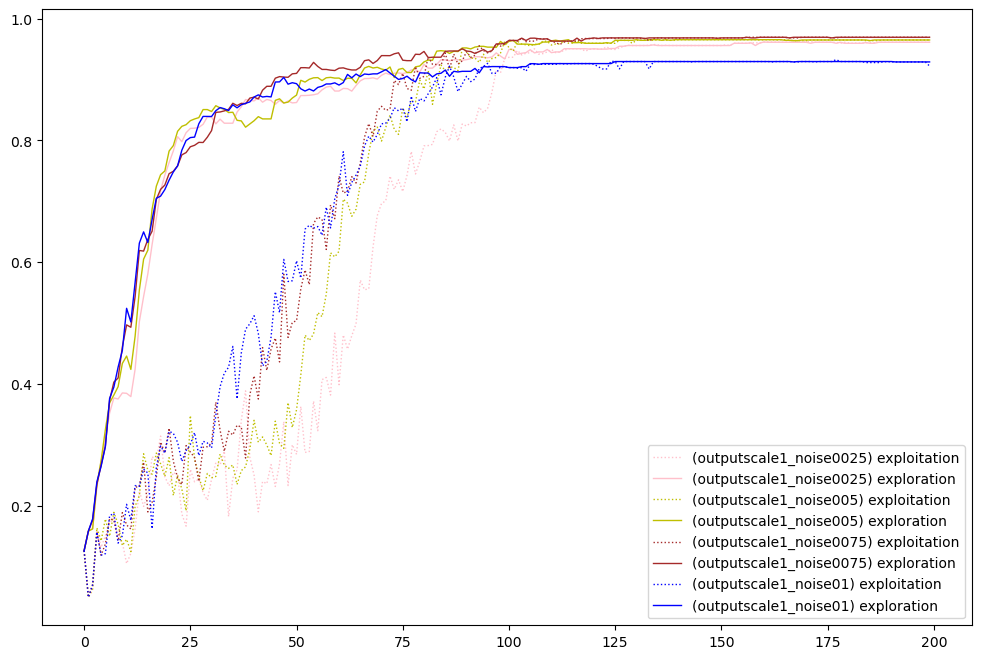

In [88]:
plt.figure(figsize=(12,8))

plt.plot(ppf0025.exploitation(), color='pink', linewidth=1, ls=':', label='(outputscale1_noise0025) exploitation')
plt.plot(ppf0025.exploration(), color='pink', linewidth=1, label='(outputscale1_noise0025) exploration')
plt.plot(ppf005.exploitation(), color='y', linewidth=1, ls=':', label='(outputscale1_noise005) exploitation')
plt.plot(ppf005.exploration(), color='y', linewidth=1, label='(outputscale1_noise005) exploration')
plt.plot(ppf0075.exploitation(), color='brown', linewidth=1, ls=':', label='(outputscale1_noise0075) exploitation')
plt.plot(ppf0075.exploration(), color='brown', linewidth=1, label='(outputscale1_noise0075) exploration')
plt.plot(ppf01.exploitation(), color='b', linewidth=1, ls=':', label='(outputscale1_noise01) exploitation')
plt.plot(ppf01.exploration(), color='b', linewidth=1, label='(outputscale1_noise01) exploration')


plt.legend()
plt.show()

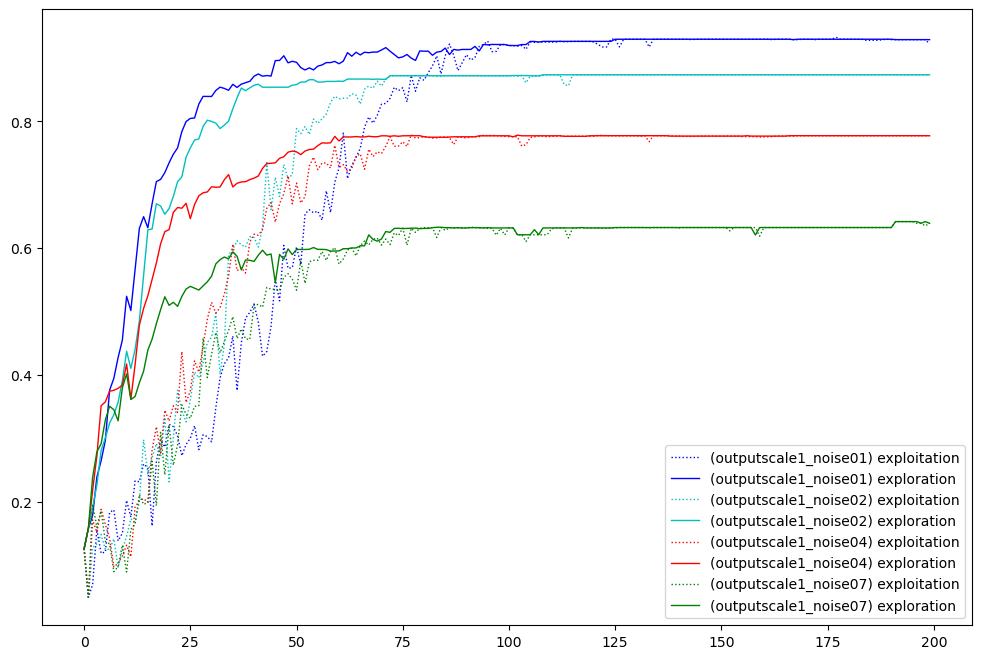

In [87]:
plt.figure(figsize=(12,8))

plt.plot(ppf01.exploitation(), color='b', linewidth=1, ls=':', label='(outputscale1_noise01) exploitation')
plt.plot(ppf01.exploration(), color='b', linewidth=1, label='(outputscale1_noise01) exploration')
plt.plot(ppf02.exploitation(), color='c', linewidth=1, ls=':', label='(outputscale1_noise02) exploitation')
plt.plot(ppf02.exploration(), color='c', linewidth=1, label='(outputscale1_noise02) exploration')
plt.plot(ppf04.exploitation(), color='r', linewidth=1, ls=':', label='(outputscale1_noise04) exploitation')
plt.plot(ppf04.exploration(), color='r', linewidth=1, label='(outputscale1_noise04) exploration')
plt.plot(ppf07.exploitation(), color='g', linewidth=1, ls=':', label='(outputscale1_noise07) exploitation')
plt.plot(ppf07.exploration(), color='g', linewidth=1, label='(outputscale1_noise07) exploration')

plt.legend()
plt.show()

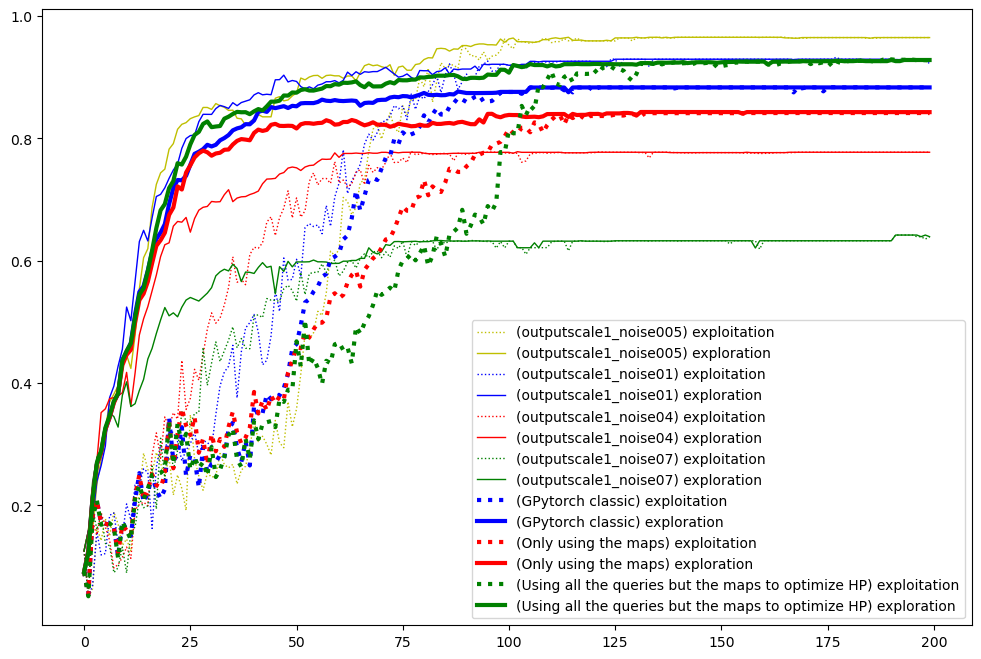

In [10]:
plt.figure(figsize=(12,8))
plt.plot(ppf005.exploitation(), color='y', linewidth=1, ls=':', label='(outputscale1_noise005) exploitation')
plt.plot(ppf005.exploration(), color='y', linewidth=1, label='(outputscale1_noise005) exploration')
plt.plot(ppf01.exploitation(), color='b', linewidth=1, ls=':', label='(outputscale1_noise01) exploitation')
plt.plot(ppf01.exploration(), color='b', linewidth=1, label='(outputscale1_noise01) exploration')
plt.plot(ppf04.exploitation(), color='r', linewidth=1, ls=':', label='(outputscale1_noise04) exploitation')
plt.plot(ppf04.exploration(), color='r', linewidth=1, label='(outputscale1_noise04) exploration')
plt.plot(ppf07.exploitation(), color='g', linewidth=1, ls=':', label='(outputscale1_noise07) exploitation')
plt.plot(ppf07.exploration(), color='g', linewidth=1, label='(outputscale1_noise07) exploration')

plt.plot(pp1.exploitation(), color='b', linewidth=3, ls=':', label='(GPytorch classic) exploitation')
plt.plot(pp1.exploration(), color='b', linewidth=3, label='(GPytorch classic) exploration')
plt.plot(pp2.exploitation(), color='r', linewidth=3, ls=':', label='(Only using the maps) exploitation')
plt.plot(pp2.exploration(), color='r', linewidth=3, label='(Only using the maps) exploration')
plt.plot(pp3.exploitation(), color='g', linewidth=3, ls=':', label='(Using all the queries but the maps to optimize HP) exploitation')
plt.plot(pp3.exploration(), color='g', linewidth=3, label='(Using all the queries but the maps to optimize HP) exploration')

plt.legend()
plt.show()

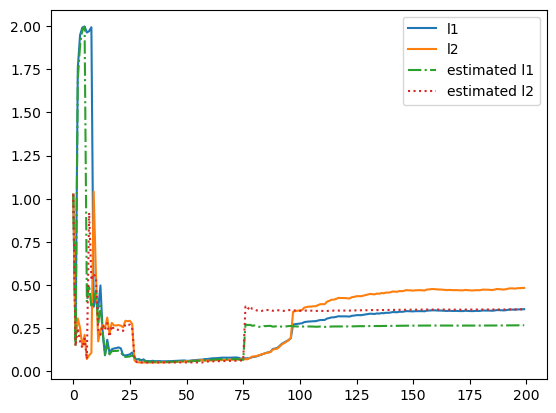

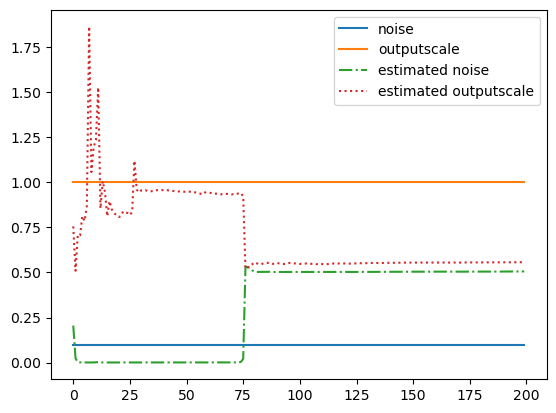

In [8]:
plt.plot(ppf1.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(ppf1.hyperparams_lengthscale[0,0,1,:], label='l2')
plt.plot(ppf1.QI_hyperparams_lengthscale[0,0,0,:], label='estimated l1', ls='-.')
plt.plot(ppf1.QI_hyperparams_lengthscale[0,0,1,:], label='estimated l2', ls=':')
plt.legend()
plt.show()

plt.plot(ppf1.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(ppf1.hyperparams_outputscale[0,0,0,:], label='outputscale')
plt.plot(ppf1.QI_hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
plt.plot(ppf1.QI_hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()

## SPEED

In [59]:
ppa = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_.npz')
ppa.load_data(load_hyperparams=True)

ppb = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_80.npz')
ppb.load_data(load_hyperparams=True)

ppc = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_60.npz')
ppc.load_data(load_hyperparams=True)

ppd = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_150.npz')
ppd.load_data(load_hyperparams=True)

pp95 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_95.npz')
pp95.load_data(load_hyperparams=True)

pp99 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_99.npz')
pp99.load_data(load_hyperparams=True)

pp100 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_100.npz')
pp100.load_data(load_hyperparams=True)

pp96 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_96.npz')
pp96.load_data(load_hyperparams=True)
pp97 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_97.npz')
pp97.load_data(load_hyperparams=True)
pp98 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_98.npz')
pp98.load_data(load_hyperparams=True)
pp101 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_101.npz')
pp101.load_data(load_hyperparams=True)
pp102 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_101.npz')
pp102.load_data(load_hyperparams=True)
pp90 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_90.npz')
pp90.load_data(load_hyperparams=True)
pp94 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_94.npz')
pp94.load_data(load_hyperparams=True)


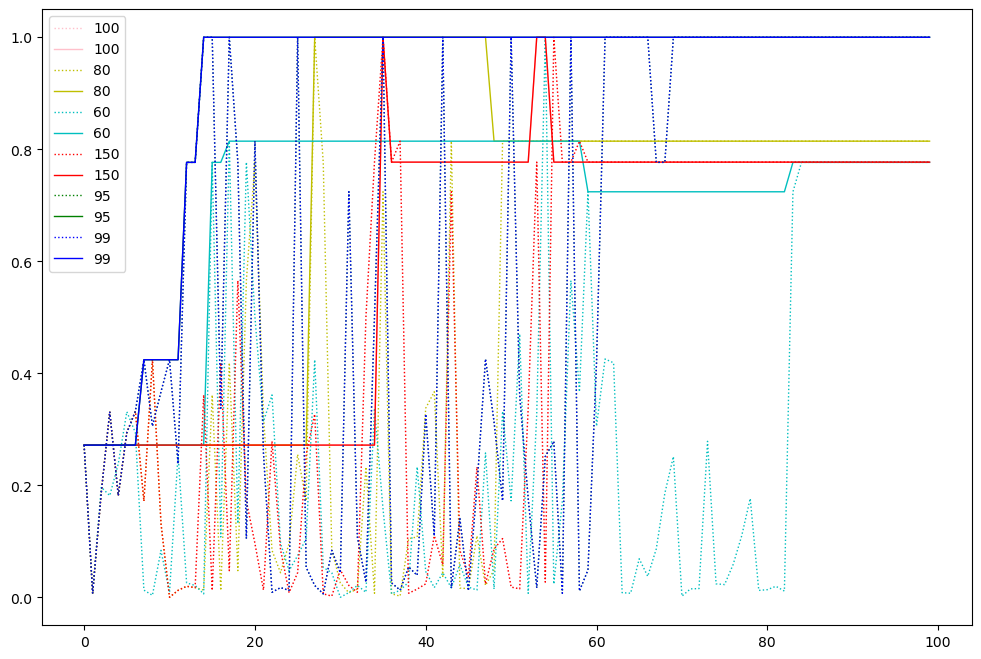

In [38]:
plt.figure(figsize=(12,8))
plt.plot(ppa.exploitation(), color='pink', linewidth=1, ls=':', label='100')
plt.plot(ppa.exploration(), color='pink', linewidth=1, label='100')
plt.plot(ppb.exploitation(), color='y', linewidth=1, ls=':', label='80')
plt.plot(ppb.exploration(), color='y', linewidth=1, label='80')
plt.plot(ppc.exploitation(), color='c', linewidth=1, ls=':', label='60')
plt.plot(ppc.exploration(), color='c', linewidth=1, label='60')
plt.plot(ppd.exploitation(), color='r', linewidth=1, ls=':', label='150')
plt.plot(ppd.exploration(), color='r', linewidth=1, label='150')
plt.plot(ppe.exploitation(), color='g', linewidth=1, ls=':', label='95')
plt.plot(ppe.exploration(), color='g', linewidth=1, label='95')
plt.plot(ppf.exploitation(), color='b', linewidth=1, ls=':', label='99')
plt.plot(ppf.exploration(), color='b', linewidth=1, label='99')

plt.legend()
plt.show()

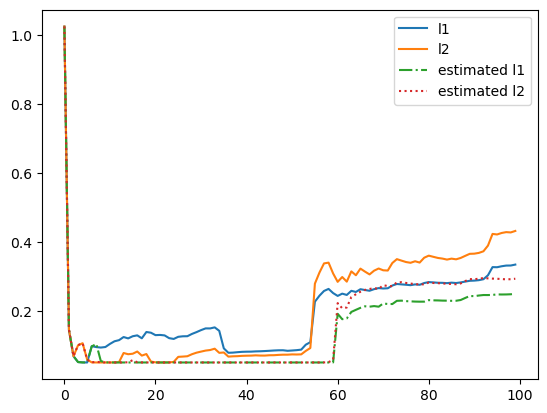

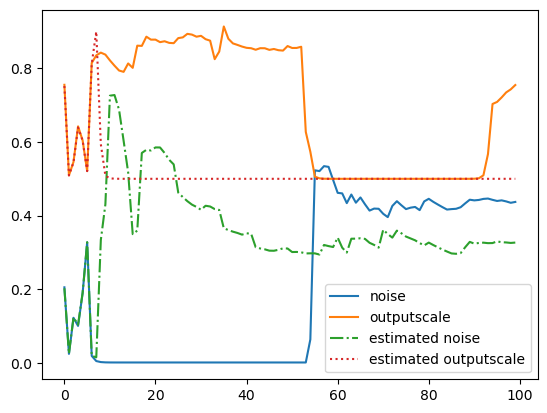

In [74]:
ppp = pp94
pppp = pp100
plt.plot(pppp.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pppp.hyperparams_lengthscale[0,0,1,:], label='l2')
plt.plot(ppp.hyperparams_lengthscale[0,0,0,:], label='estimated l1', ls='-.')
plt.plot(ppp.hyperparams_lengthscale[0,0,1,:], label='estimated l2', ls=':')
plt.legend()
plt.show()

plt.plot(pppp.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pppp.hyperparams_outputscale[0,0,0,:], label='outputscale')
plt.plot(ppp.hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
plt.plot(ppp.hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()

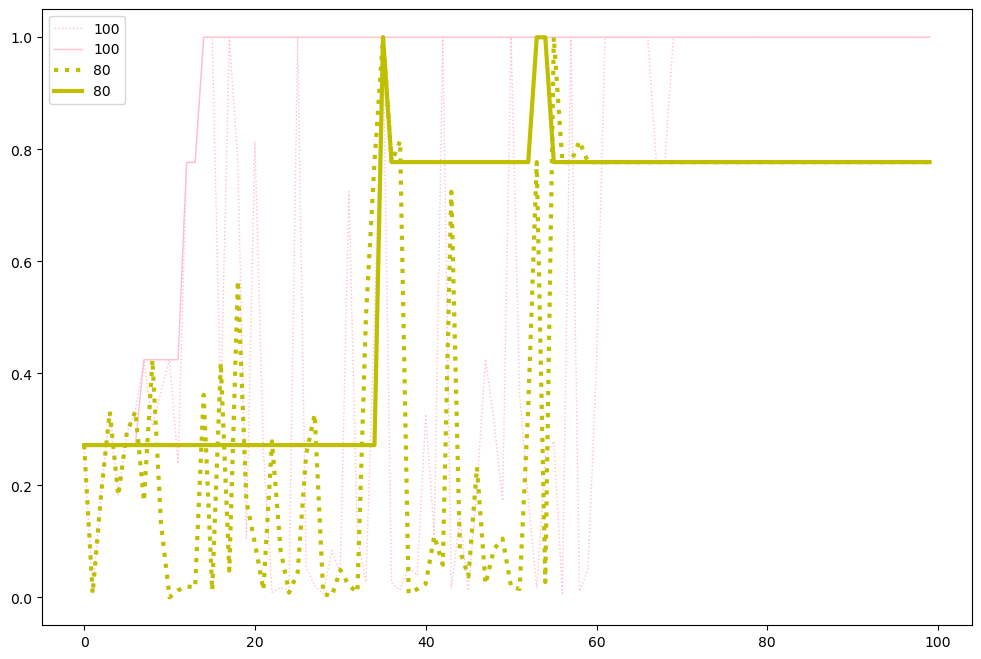

In [75]:
plt.figure(figsize=(12,8))
plt.plot(ppp.exploitation(), color='pink', linewidth=1, ls=':', label='100')
plt.plot(ppp.exploration(), color='pink', linewidth=1, label='100')
plt.plot(pppp.exploitation(), color='y', linewidth=3, ls=':', label='80')
plt.plot(pppp.exploration(), color='y', linewidth=3, label='80')

plt.legend()
plt.show()

In [96]:
pa95 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_95_a.npz')
pa95.load_data(load_hyperparams=True)
pb95 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_95_b.npz')
pb95.load_data(load_hyperparams=True)
pa100 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_100_a.npz')
pa100.load_data(load_hyperparams=True)
pb100 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_100_b.npz')
pb100.load_data(load_hyperparams=True)

pb200 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_200_b.npz')
pb200.load_data(load_hyperparams=True)

pb10 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_10_b.npz')
pb10.load_data(load_hyperparams=True)

pbb10 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_10_bb.npz')
pbb10.load_data(load_hyperparams=True)

pb30 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_30_b.npz')
pb30.load_data(load_hyperparams=True)

pb60 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_60_b.npz')
pb60.load_data(load_hyperparams=True)


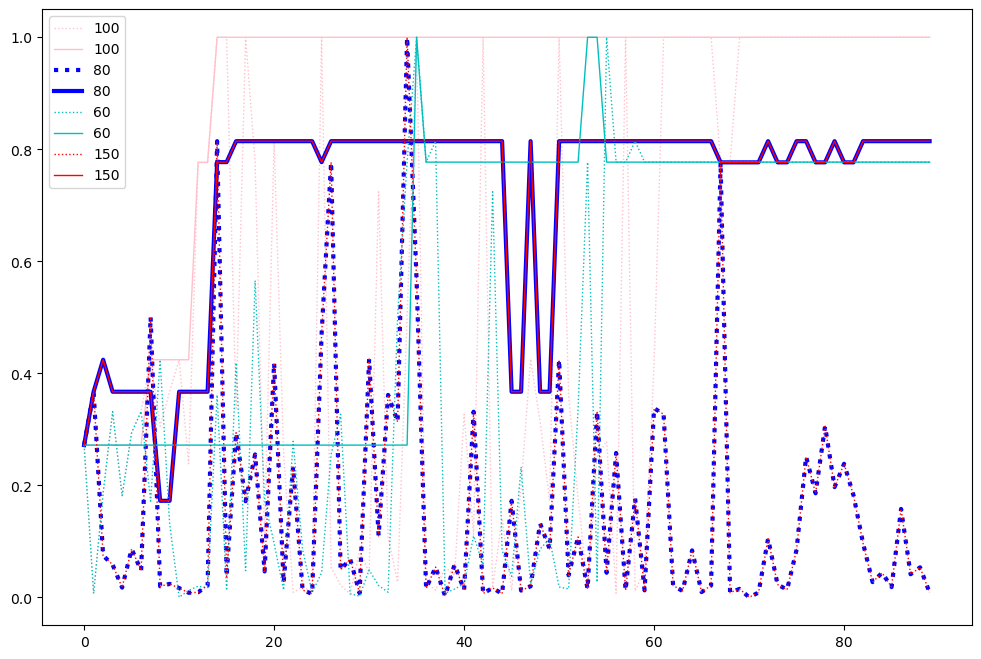

In [79]:
plt.figure(figsize=(12,8))
plt.plot(pa95.exploitation(), color='pink', linewidth=1, ls=':', label='100')
plt.plot(pa95.exploration(), color='pink', linewidth=1, label='100')
plt.plot(pb95.exploitation(), color='b', linewidth=3, ls=':', label='80')
plt.plot(pb95.exploration(), color='b', linewidth=3, label='80')
plt.plot(pa100.exploitation(), color='c', linewidth=1, ls=':', label='60')
plt.plot(pa100.exploration(), color='c', linewidth=1, label='60')
plt.plot(pb100.exploitation(), color='r', linewidth=1, ls=':', label='150')
plt.plot(pb100.exploration(), color='r', linewidth=1, label='150')

plt.legend()
plt.show()

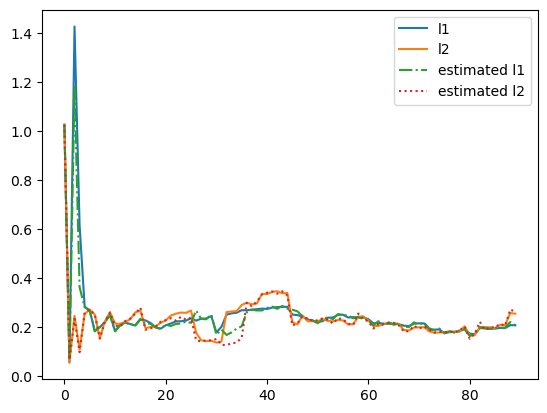

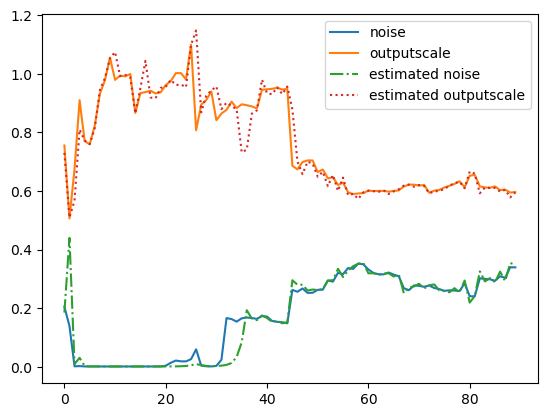

In [100]:
ppp = pbb10
pppp = pb100
plt.plot(pppp.hyperparams_lengthscale[0,0,0,:], label='l1')
plt.plot(pppp.hyperparams_lengthscale[0,0,1,:], label='l2')
plt.plot(ppp.hyperparams_lengthscale[0,0,0,:], label='estimated l1', ls='-.')
plt.plot(ppp.hyperparams_lengthscale[0,0,1,:], label='estimated l2', ls=':')
plt.legend()
plt.show()

plt.plot(pppp.hyperparams_noise[0,0,0,:], label='noise')
plt.plot(pppp.hyperparams_outputscale[0,0,0,:], label='outputscale')
plt.plot(ppp.hyperparams_noise[0,0,0,:], label='estimated noise', ls='-.')
plt.plot(ppp.hyperparams_outputscale[0,0,0,:], label='estimated outputscale', ls=':')
plt.legend()
plt.show()